In [ ]:
# pip install transformers torch tf-keras

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from transformers import TFAutoModelForSequenceClassification

import pandas as pd
import requests
from bs4 import BeautifulSoup

In [22]:
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = TFAutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

def pipeLineMethod(payload):
    res = classifier(payload)
    return res[0]

columns = ['datetime', 'title', 'source', 'link', 'top_sentiment', 'sentiment_score']
df = pd.DataFrame(columns=columns)

counter = 0
for page in range(1, 400):
    url = f'https://markets.businessinsider.com/news/aapl?p={page}'
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'lxml')

    articles = soup.find_all('div', class_='latest-news__story')
    for article in articles:
        datetime = article.find('time', class_='latest-news__date').get('datetime')
        title = article.find('a', class_='news-link').text
        source = article.find('span', class_='latest-news__source').text
        link = article.find('a', class_='news-link').get('href')

        if title and title.strip():
            output = pipeLineMethod(title)
            top_sentiment = output['label']
            sentiment_score = output['score']
        else:
            top_sentiment = None
            sentiment_score = None

        df = pd.concat([pd.DataFrame([{'datetime': datetime, 'title': title, 'source': source, 'link': link, 'top_sentiment': top_sentiment, 'sentiment_score': sentiment_score}], columns=df.columns), df], ignore_index=True)
        counter += 1


df.to_csv('news_data.csv')

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use 0
/var/folders/58/ndggy7ls36s3900y9633wfhc0000gn/T/ipykernel_53832/939443568.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.DataFrame([{'datetime': datetime, 'title': title, 'source': source, 'link': link, 'top_sentiment': top_sentiment, 'sentiment_score': sentiment_score}], columns=df.columns), df], ignore_index=True)


19950 pages scraped of 50 headlines


In [25]:
df['date_only'] = pd.to_datetime(df['datetime']).dt.date

In [26]:
df[:50]

,datetime,title,source,link,top_sentiment,sentiment_score,date_only
0,10/27/2015 11:22:00 AM,World stocks rally stalls as investors eye Fed...,Reuters,http://feeds.reuters.com/~r/reuters/INbusiness...,negative,0.342419,2015-10-27
1,10/27/2015 9:32:29 PM,Apple revenue jumps 22 percent as iPhone sales...,Reuters,http://feeds.reuters.com/~r/reuters/businessNe...,neutral,0.384592,2015-10-27
2,10/27/2015 9:49:02 PM,"Apple revenue, profit beat as iPhone sales surge",Reuters,http://feeds.reuters.com/~r/reuters/INbusiness...,neutral,0.391140,2015-10-27
3,10/28/2015 1:10:10 AM,"Apple beats Wall Street, investors wary of Chi...",Reuters,http://feeds.reuters.com/~r/reuters/businessNe...,neutral,0.343884,2015-10-28
4,10/28/2015 1:40:30 AM,Apple investors focus on iPhone sales for the ...,Reuters,http://feeds.reuters.com/~r/reuters/INbusiness...,positive,0.367719,2015-10-28
5,10/28/2015 12:21:08 PM,Stock futures rise after Apple results; Fed st...,Reuters,http://feeds.reuters.com/~r/reuters/businessNe...,negative,0.349746,2015-10-28
6,10/28/2015 2:23:13 PM,"Global stocks retreat ahead of Apple, Fed; oil...",Reuters,http://feeds.reuters.com/~r/reuters/INbusiness...,negative,0.460478,2015-10-28
7,10/28/2015 2:51:33 PM,Apple defies China slowdown fears with strong ...,Reuters,http://feeds.reuters.com/~r/reuters/businessNe...,neutral,0.415623,2015-10-28
8,10/28/2015 5:26:08 PM,"Wall Street higher on Apple, energy stocks; Fe...",Reuters,http://feeds.reuters.com/~r/reuters/INbusiness...,neutral,0.395471,2015-10-28
9,11/10/2015 4:01:39 PM,Wall St dips as Apple adds to fears of weakeni...,Reuters,http://feeds.reuters.com/~r/reuters/INbusiness...,negative,0.409356,2015-11-10


In [ ]:
df.to_csv('apple_parsed_news_data_businessinsider.csv')

In [27]:
df.dtypes

datetime            object
title               object
source              object
link                object
top_sentiment       object
sentiment_score    float64
date_only           object
dtype: object

In [28]:
df['date_only'].value_counts()

date_only
2019-01-03    97
2020-02-18    62
2018-09-12    59
2019-03-25    58
2019-01-30    50
              ..
2018-03-10     1
2018-03-11     1
2023-04-08     1
2024-03-03     1
2025-05-03     1
Name: count, Length: 2861, dtype: int64

In [30]:
df = df.sort_values(by='date_only')
df

,datetime,title,source,link,top_sentiment,sentiment_score,date_only
0,10/27/2015 11:22:00 AM,World stocks rally stalls as investors eye Fed...,Reuters,http://feeds.reuters.com/~r/reuters/INbusiness...,negative,0.342419,2015-10-27
1,10/27/2015 9:32:29 PM,Apple revenue jumps 22 percent as iPhone sales...,Reuters,http://feeds.reuters.com/~r/reuters/businessNe...,neutral,0.384592,2015-10-27
2,10/27/2015 9:49:02 PM,"Apple revenue, profit beat as iPhone sales surge",Reuters,http://feeds.reuters.com/~r/reuters/INbusiness...,neutral,0.391140,2015-10-27
4,10/28/2015 1:40:30 AM,Apple investors focus on iPhone sales for the ...,Reuters,http://feeds.reuters.com/~r/reuters/INbusiness...,positive,0.367719,2015-10-28
6,10/28/2015 2:23:13 PM,"Global stocks retreat ahead of Apple, Fed; oil...",Reuters,http://feeds.reuters.com/~r/reuters/INbusiness...,negative,0.460478,2015-10-28
...,...,...,...,...,...,...,...
19948,5/2/2025 8:46:42 PM,Apple (AAPL) Partners with Anthropic to Develo...,TipRanks,/news/stocks/apple-aapl-partners-with-anthropi...,neutral,0.461461,2025-05-02
19931,5/2/2025 1:11:19 PM,Apple price target raised to $250 from $230 at...,TipRanks,/news/stocks/apple-price-target-raised-to-250-...,neutral,0.423781,2025-05-02
19940,5/2/2025 4:26:30 PM,Buffett poised to take center stage again at B...,Seeking Alpha,https://seekingalpha.com/news/4440258-buffett-...,neutral,0.376875,2025-05-02
19919,5/2/2025 11:20:12 AM,Apple downgraded to Neutral from Buy at Rosenb...,TipRanks,/news/stocks/apple-downgraded-to-neutral-from-...,negative,0.372744,2025-05-02


In [31]:
df['date_only'].value_counts()

date_only
2019-01-03    97
2020-02-18    62
2018-09-12    59
2019-03-25    58
2019-01-30    50
              ..
2018-03-10     1
2018-03-11     1
2023-04-08     1
2024-03-03     1
2025-05-03     1
Name: count, Length: 2861, dtype: int64

In [34]:
df1 = df.copy()
df1 = df1[df1['date_only'] >= '2018-01-01']

In [35]:
# Убедимся, что date_only — это datetime
df1['date_only'] = pd.to_datetime(df1['date_only'])

# Получаем все уникальные даты из df
observed_dates = pd.to_datetime(df1['date_only'].unique())

# Строим полный диапазон от min до max
full_range = pd.date_range(start=observed_dates.min(), end=observed_dates.max(), freq='D')

# Находим отсутствующие
missing_dates = full_range.difference(observed_dates)

print("Пропущенные даты:")
print(missing_dates)
print(len(missing_dates))

Пропущенные даты:
DatetimeIndex(['2018-01-07', '2018-01-11', '2018-02-04', '2018-02-17',
               '2018-03-17', '2018-03-18', '2018-04-01', '2018-04-14',
               '2018-04-22', '2018-05-20',
               ...
               '2025-02-09', '2025-03-01', '2025-03-02', '2025-03-08',
               '2025-03-09', '2025-03-16', '2025-03-23', '2025-03-29',
               '2025-03-30', '2025-04-26'],
              dtype='datetime64[ns]', length=354, freq=None)
354


In [49]:
apple_news_data_parsed = pd.read_csv('apple_parsed_news_data_businessinsider.csv')
apple_news_data_parsed['datetime'] = pd.to_datetime(apple_news_data_parsed['datetime'])
apple_news_parsed_sentiment = apple_news_data_parsed[['date_only', 'top_sentiment']].rename(columns={'date_only': 'date', 'top_sentiment': 'sentiment'})
apple_news_parsed_sentiment = apple_news_parsed_sentiment[apple_news_parsed_sentiment['date'] >= '2018-01-01']
apple_news_parsed_sentiment

,date,sentiment
3613,2018-01-01,neutral
3614,2018-01-01,neutral
3615,2018-01-02,neutral
3616,2018-01-02,neutral
3617,2018-01-02,negative
...,...,...
19945,2025-05-02,neutral
19946,2025-05-02,neutral
19947,2025-05-02,neutral
19948,2025-05-02,negative


In [120]:
nasdaq_history = pd.read_csv("news_sentiment_history_nasdaq_all.csv")
nasdaq_history

,date,symbol,article,sentiment_score
0,1969-12-31 00:00:00+00:00,MRH,Montpelier Re Holdings Ltd. (MRH): New Analyst...,0.0000
1,2009-02-14 00:00:00+00:00,NAV,How Treasuries and ETFs Work,0.2263
2,2009-04-08 00:00:00+00:00,DIG,"Leveraged ETFs are convenient, but are they mo...",0.9999
3,2009-04-08 00:00:00+00:00,SMN,"Leveraged ETFs are convenient, but are they mo...",0.9999
4,2009-04-08 00:00:00+00:00,EEV,"Leveraged ETFs are convenient, but are they mo...",0.9999
...,...,...,...,...
5744667,2024-01-09 00:00:00+00:00,AMD,The trillion-dollar club is certainly rarified...,0.9989
5744668,2024-01-09 00:00:00+00:00,AMD,"For Immediate Release\nChicago, IL – January 9...",0.9998
5744669,2024-01-09 00:00:00+00:00,AMD,The iShares Semiconductor ETF (SOXX) was launc...,0.9965
5744670,2024-01-09 00:00:00+00:00,AMD,U.S. stock markets closed sharply higher on Mo...,0.9898


In [121]:
nasdaq_history = nasdaq_history[(nasdaq_history['date'] >= '2018-01-01') & (nasdaq_history['symbol'] == 'AAPL')]
nasdaq_history['sentiment'] = nasdaq_history['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
nasdaq_history['date'] = pd.to_datetime(nasdaq_history['date']).dt.date
apple_news_nasdaq_sentiment = nasdaq_history[['date', 'sentiment']]
apple_news_nasdaq_sentiment

/var/folders/58/ndggy7ls36s3900y9633wfhc0000gn/T/ipykernel_53832/1141907910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nasdaq_history['sentiment'] = nasdaq_history['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
/var/folders/58/ndggy7ls36s3900y9633wfhc0000gn/T/ipykernel_53832/1141907910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nasdaq_history['date'] = pd.to_datetime(nasdaq_history['date']).dt.date


,date,sentiment
4082298,2020-03-09,neutral
4082301,2020-03-09,neutral
4082430,2020-03-09,negative
4084523,2020-03-10,neutral
4084557,2020-03-10,positive
...,...,...
5739700,2023-12-16,positive
5739701,2023-12-16,positive
5739708,2023-12-16,positive
5742017,2023-12-16,positive


In [122]:
print(apple_news_parsed_sentiment.shape)
print(apple_news_nasdaq_sentiment.shape)

(16337, 2)
(9338, 2)


In [123]:
apple_news_parsed_sentiment

,date,sentiment
3613,2018-01-01,neutral
3614,2018-01-01,neutral
3615,2018-01-02,neutral
3616,2018-01-02,neutral
3617,2018-01-02,negative
...,...,...
19945,2025-05-02,neutral
19946,2025-05-02,neutral
19947,2025-05-02,neutral
19948,2025-05-02,negative


In [124]:
apple_news_nasdaq_sentiment

,date,sentiment
4082298,2020-03-09,neutral
4082301,2020-03-09,neutral
4082430,2020-03-09,negative
4084523,2020-03-10,neutral
4084557,2020-03-10,positive
...,...,...
5739700,2023-12-16,positive
5739701,2023-12-16,positive
5739708,2023-12-16,positive
5742017,2023-12-16,positive


In [125]:
print(apple_news_parsed_sentiment.nunique())
print(apple_news_nasdaq_sentiment.nunique())

date         2326
sentiment       3
dtype: int64
date         639
sentiment      3
dtype: int64


In [62]:
apple_news_parsed_sentiment.dtypes

date         object
sentiment    object
dtype: object

In [61]:
apple_news_nasdaq_sentiment.dtypes

date         object
sentiment    object
dtype: object

In [126]:
# Убедитесь, что столбцы 'date' в одинаковом формате
apple_news_parsed_sentiment['date'] = pd.to_datetime(apple_news_parsed_sentiment['date'])
apple_news_nasdaq_sentiment['date'] = pd.to_datetime(apple_news_nasdaq_sentiment['date'])



/var/folders/58/ndggy7ls36s3900y9633wfhc0000gn/T/ipykernel_53832/2395016449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_news_nasdaq_sentiment['date'] = pd.to_datetime(apple_news_nasdaq_sentiment['date'])


In [127]:
# Оставим только те строки, даты которых нет в первом датасете
new_rows = apple_news_nasdaq_sentiment[
    ~apple_news_nasdaq_sentiment['date'].isin(apple_news_parsed_sentiment['date'])
]

new_rows

# Добавим их к основному датасету
apple_news_final = pd.concat([apple_news_parsed_sentiment, new_rows], ignore_index=True)
apple_news_final

,date,sentiment
0,2018-01-01,neutral
1,2018-01-01,neutral
2,2018-01-02,neutral
3,2018-01-02,neutral
4,2018-01-02,negative
...,...,...
16611,2023-12-16,positive
16612,2023-12-16,positive
16613,2023-12-16,positive
16614,2023-12-16,positive


In [67]:
# Получаем все уникальные даты из df
observed_dates = pd.to_datetime(apple_news_final['date'].unique())

# Строим полный диапазон от min до max
full_range = pd.date_range(start=observed_dates.min(), end=observed_dates.max(), freq='D')

# Находим отсутствующие
missing_dates = full_range.difference(observed_dates)

print("Пропущенные даты:")
print(missing_dates)
print(len(missing_dates))

Пропущенные даты:
DatetimeIndex(['2018-01-07', '2018-02-04', '2018-03-17', '2018-03-18',
               '2018-04-14', '2018-04-22', '2018-05-20', '2018-06-24',
               '2018-07-01', '2018-07-04',
               ...
               '2025-02-09', '2025-03-01', '2025-03-02', '2025-03-08',
               '2025-03-09', '2025-03-16', '2025-03-23', '2025-03-29',
               '2025-03-30', '2025-04-26'],
              dtype='datetime64[ns]', length=174, freq=None)
174


In [68]:
# Получаем все уникальные даты из df
observed_dates = pd.to_datetime(apple_news_nasdaq_sentiment['date'].unique())

# Строим полный диапазон от min до max
full_range = pd.date_range(start=observed_dates.min(), end=observed_dates.max(), freq='D')

# Находим отсутствующие
missing_dates = full_range.difference(observed_dates)

print("Пропущенные даты:")
print(missing_dates)
print(len(missing_dates))

Пропущенные даты:
DatetimeIndex(['2018-01-07', '2018-01-14', '2018-01-27', '2018-01-28',
               '2018-02-03', '2018-02-04', '2018-02-10', '2018-02-18',
               '2018-03-03', '2018-03-04',
               ...
               '2022-05-14', '2022-05-15', '2022-05-21', '2022-05-22',
               '2022-05-28', '2022-05-29', '2022-06-19', '2022-07-10',
               '2022-07-16', '2022-11-27'],
              dtype='datetime64[ns]', length=275, freq=None)
275


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = TFAutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

def pipeLineMethod(payload):
    res = classifier(payload)
    return res[0]

columns = ['datetime', 'title', 'source', 'link', 'top_sentiment', 'sentiment_score']
df = pd.DataFrame(columns=columns)

counter = 0
for page in range(1, 1000):
    url = f'https://www.investing.com/equities/apple-computer-inc-news/{page}'
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'lxml')

    articles = soup.find_all('div', class_='latest-news__story')
    for article in articles:
        datetime = article.find('time', class_='latest-news__date').get('datetime')
        title = article.find('a', class_='news-link').text
        source = article.find('span', class_='latest-news__source').text
        link = article.find('a', class_='news-link').get('href')

        if title and title.strip():
            output = pipeLineMethod(title)
            top_sentiment = output['label']
            sentiment_score = output['score']
        else:
            top_sentiment = None
            sentiment_score = None

        df = pd.concat([pd.DataFrame([{'datetime': datetime, 'title': title, 'source': source, 'link': link, 'top_sentiment': top_sentiment, 'sentiment_score': sentiment_score}], columns=df.columns), df], ignore_index=True)
        counter += 1


df.to_csv('news_data.csv')

In [74]:
import requests
from bs4 import BeautifulSoup

url = f'https://www.investing.com/equities/apple-computer-inc-news/1'
response = requests.get(url)
html = response.text
soup = BeautifulSoup(html, 'lxml')

print(html)
# Находим список новостей
news_list = soup.find("ul", attrs={"data-test": "news-list"})

print(news_list)
# # Сохраняем заголовки и даты
# results = []

# for item in news_list.find_all("li"):
#     # Заголовок
#     title_tag = item.find("a", attrs={"data-test": "article-title-link"})
#     title = title_tag.text.strip() if title_tag else "No Title"

#     # Дата — можно попытаться найти по другим селекторам, если она есть в DOM
#     # Ниже — примерный поиск даты, если она задана как span с time или text
#     date_tag = item.find("span", class_="date") or item.find("time")
#     date = date_tag.text.strip() if date_tag else "No Date"

#     results.append((title, date))

# # Выводим результат
# for title, date in results:
#     print(f"{date}: {title}")


<!DOCTYPE html><html lang="en-US"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><style>*{box-sizing:border-box;margin:0;padding:0}html{line-height:1.15;-webkit-text-size-adjust:100%;color:#313131;font-family:system-ui,-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Helvetica Neue,Arial,Noto Sans,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol,Noto Color Emoji}body{display:flex;flex-direction:column;height:100vh;min-height:100vh}.main-content{margin:8rem auto;max-width:60rem;padding-left:1.5rem}@media (width <= 720px){.main-content{margin-top:4rem}}.h2{font-size:1.5rem;font-weight:500;line-height:2.25rem}@media (width <= 720px){.h2{font-size:1.25rem;line-height:1.5rem}}#challenge-error-text{background-image:url();background-repeat:no-repeat;background-s

In [ ]:
import requests
from bs4 import BeautifulSoup

# Пример: если HTML приходит с сайта
url = "https://www.investing.com/news/pro"
headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# Находим список новостей
news_list = soup.find("ul", attrs={"data-test": "news-list"})

# Сохраняем заголовки и даты
results = []

for item in news_list.find_all("li"):
    # Заголовок
    title_tag = item.find("a", attrs={"data-test": "article-title-link"})
    title = title_tag.text.strip() if title_tag else "No Title"

    # Дата — можно попытаться найти по другим селекторам, если она есть в DOM
    # Ниже — примерный поиск даты, если она задана как span с time или text
    date_tag = item.find("span", class_="date") or item.find("time")
    date = date_tag.text.strip() if date_tag else "No Date"

    results.append((title, date))

# Выводим результат
for title, date in results:
    print(f"{date}: {title}")


In [75]:
from bs4 import BeautifulSoup

# 1. Открываем HTML-файл
with open("market_watch_html.html", "r", encoding="utf-8") as f:
    html_content = f.read()

html_content

# # 2. Создаем объект BeautifulSoup
# soup = BeautifulSoup(html_content, "html.parser")

# # 3. Пример: находим заголовки новостей (например, все теги <h2>)
# titles = soup.find_all("h2")
# for title in titles:
#     print(title.text.strip())

'\n\n\n<!DOCTYPE html>\n<html class="icons-loaded" lang="en">\n<head>\n        <title>AAPL Stock Price | Apple Inc. Stock Quote (U.S.: Nasdaq) | MarketWatch</title>\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n        <meta name="viewport" content="width=device-width, initial-scale=1.0">\n            <meta name="robots" content="noarchive, nocache, noodp">\n\n\n<link rel="dns-prefetch" href="//sts.wsj.net" />\n<link rel="dns-prefetch" href="//s.marketwatch.com" />\n<link rel="dns-prefetch" href="//video-api.wsj.com" />\n<link rel="dns-prefetch" href="//fonts.wsj.net" />\n<link rel="dns-prefetch" href="//m.wsj.net" />\n<link rel="dns-prefetch" href="//mwstream.wsj.net" />\n<link rel="dns-prefetch" href="//tags.tiqcdn.com" />\n<link rel="dns-prefetch" href="//s.ntv.io" />\n<link rel="dns-prefetch" href="//cdn.cxense.com" />\n<link rel="dns-prefetch" href="//a248.e.akamai.net" />\n<link rel="dns-prefetch" href="//om.dowjoneson.com" />\n<l

In [77]:
# Создаём объект BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Ищем все статьи
articles = soup.find_all('div', class_='element--article')

print(len(articles))
# Собираем нужные данные
for article in articles:
    timestamp = article.get('data-timestamp')
    headline_tag = article.find('h3', class_='article__headline')
    headline = headline_tag.get_text(strip=True) if headline_tag else 'Нет заголовка'
    print(f'Timestamp: {timestamp}, Headline: {headline}')
    


49
Timestamp: 1746285840000, Headline: OpinionHere’s what I’ve learned after writing about Apple, Intel and Silicon Valley for over 30 years
Timestamp: 1746280620000, Headline: Big Tech showed it won’t back down on AI spending. Some on Wall Street are still wary.
Timestamp: 1746342000000, Headline: MarketsGiant U.S. Pension sold Nvidia, Tesla, and Apple Stock. It Bought Rivian.
Timestamp: 1746342000000, Headline: MarketsGiant U.S. Pension sold Nvidia, Tesla, and Apple Stock. It Bought Rivian.
Timestamp: 1746314640000, Headline: The Lesson in Buffett’s Winning Apple Bet
Timestamp: 1746285840000, Headline: OpinionHere’s what I’ve learned after writing about Apple, Intel and Silicon Valley for over 30 years
Timestamp: 1746280620000, Headline: Big Tech showed it won’t back down on AI spending. Some on Wall Street are still wary.
Timestamp: 1746278134858, Headline: Warren Buffett gives a shoutout to Apple CEO Tim Cook
Timestamp: 1746219120000, Headline: Tech, Media & Telecom Roundup: Market

In [78]:
import requests
from bs4 import BeautifulSoup
import time

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"
}

query = 'apple site:nasdaq.com/articles after:2020-01-01 before:2025-12-31'
base_url = 'https://yandex.ru/search/?text='
search_url = base_url + requests.utils.quote(query)

    """
    Parses news articles from a search engine's result pages.

    This function iterates over a specified number of pages, retrieves the HTML content from each page,
    and extracts the titles and URLs of news articles listed on those pages.

    @param max_pages: The maximum number of pages to parse.
    @param search_url: The base URL of the search engine's query.
    @param headers: A dictionary containing HTTP headers to include in the request.
    @return: A list of dictionaries, where each dictionary contains the 'title' and 'url' of a news article.
    """
def parse_yandex_results(search_url, max_pages=3):
    results = []

    for page in range(max_pages):
        offset = page * 10
        url = f"{search_url}&p={page}"
        print(f"Parsing: {url}")

        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')

        for item in soup.select('li.serp-item'):
            link_tag = item.select_one('a.Link')
            title_tag = item.select_one('h2')
            if link_tag and title_tag:
                href = link_tag.get('href')
                title = title_tag.get_text(strip=True)
                results.append({'title': title, 'url': href})

        time.sleep(1)  # Пауза, чтобы не заблокировали

    return results

# Пример использования
results = parse_yandex_results(search_url)

# Выводим
for r in results:
    print(f"{r['title']}\n{r['url']}\n")


Parsing: https://yandex.ru/search/?text=apple%20site%3Anasdaq.com/articles%20after%3A2020-01-01%20before%3A2025-12-31&p=0
Parsing: https://yandex.ru/search/?text=apple%20site%3Anasdaq.com/articles%20after%3A2020-01-01%20before%3A2025-12-31&p=1
Parsing: https://yandex.ru/search/?text=apple%20site%3Anasdaq.com/articles%20after%3A2020-01-01%20before%3A2025-12-31&p=2
Stock-Split Watch: IsAppleNext? | Nasdaq
https://www.nasdaq.com/articles/stock-split-watch:-is-apple-next

Apple: Growth in a Difficult Environment | Nasdaq
https://www.nasdaq.com/articles/apple-growth-difficult-environment

2 Risks toAppleStock | Nasdaq
https://www.nasdaq.com/articles/2-risks-apple-stock-2018-10-12

If You Had Invested inAppleAfterSteve Jobs’ Return...
https://www.nasdaq.com/articles/if-you-had-invested-apple-after-steve-jobs-return-youd-be-millionaire-now

When To ‘Buy Aggressively’ in2025AfterAppleStock...
https://www.nasdaq.com/articles/when-buy-aggressively-2025-after-apple-stock-overperformed-2024

Shoul

In [79]:
results

[{'title': 'Stock-Split Watch: IsAppleNext? | Nasdaq',
  'url': 'https://www.nasdaq.com/articles/stock-split-watch:-is-apple-next'},
 {'title': 'Apple: Growth in a Difficult Environment | Nasdaq',
  'url': 'https://www.nasdaq.com/articles/apple-growth-difficult-environment'},
 {'title': '2 Risks toAppleStock | Nasdaq',
  'url': 'https://www.nasdaq.com/articles/2-risks-apple-stock-2018-10-12'},
 {'title': 'If You Had Invested inAppleAfterSteve Jobs’ Return...',
  'url': 'https://www.nasdaq.com/articles/if-you-had-invested-apple-after-steve-jobs-return-youd-be-millionaire-now'},
 {'title': 'When To ‘Buy Aggressively’ in2025AfterAppleStock...',
  'url': 'https://www.nasdaq.com/articles/when-buy-aggressively-2025-after-apple-stock-overperformed-2024'},
 {'title': 'Should You BuyAppleAfterIts Stock Split? | Nasdaq',
  'url': 'https://www.nasdaq.com/articles/should-you-buy-apple-after-its-stock-split-2020-08-27'},
 {'title': '1 Reason to Be Bullish onAppleStock | Nasdaq',
  'url': 'https://w

In [83]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import time
import json

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"
}

def get_yandex_results(query, max_pages=2):
    base_url = 'https://yandex.ru/search/?text='
    results = []

    for page in range(max_pages):
        offset_url = f"{base_url}{requests.utils.quote(query)}&p={page}"
        print(f"Requesting: {offset_url}")

        response = requests.get(offset_url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')

        for item in soup.select('li.serp-item'):
            link_tag = item.select_one('a.Link')
            title_tag = item.select_one('h2')
            if link_tag and title_tag:
                href = link_tag.get('href')
                title = title_tag.get_text(strip=True)
                results.append({'title': title, 'url': href})

        time.sleep(1.5)  # Respect rate limits

    return results

# Результаты всех дней
all_results = []

for single_date in missing_dates:
    d1 = single_date.strftime('%Y-%m-%d')
    d2 = (single_date + timedelta(days=1)).strftime('%Y-%m-%d')
    yandex_query = f'apple site:nasdaq.com/articles after:{d1} before:{d2}'

    try:
        day_results = get_yandex_results(yandex_query, max_pages=2)
        for res in day_results:
            res['date'] = d1
        all_results.extend(day_results)
        print(f"{d1}: {len(day_results)} results")
    except Exception as e:
        print(f"Error on {d1}: {e}")
        time.sleep(5)  # Pausing on error

# Сохраняем результат
with open('yandex_nasdaq_apple_results.json', 'w', encoding='utf-8') as f:
    json.dump(all_results, f, ensure_ascii=False, indent=2)

print("✅ Done!")


Requesting: https://yandex.ru/search/?text=apple%20site%3Anasdaq.com/articles%20after%3A2018-01-07%20before%3A2018-01-08&p=0
Requesting: https://yandex.ru/search/?text=apple%20site%3Anasdaq.com/articles%20after%3A2018-01-07%20before%3A2018-01-08&p=1
2018-01-07: 25 results
Requesting: https://yandex.ru/search/?text=apple%20site%3Anasdaq.com/articles%20after%3A2018-01-14%20before%3A2018-01-15&p=0
Requesting: https://yandex.ru/search/?text=apple%20site%3Anasdaq.com/articles%20after%3A2018-01-14%20before%3A2018-01-15&p=1
2018-01-14: 25 results
Requesting: https://yandex.ru/search/?text=apple%20site%3Anasdaq.com/articles%20after%3A2018-01-27%20before%3A2018-01-28&p=0
Requesting: https://yandex.ru/search/?text=apple%20site%3Anasdaq.com/articles%20after%3A2018-01-27%20before%3A2018-01-28&p=1
2018-01-27: 25 results
Requesting: https://yandex.ru/search/?text=apple%20site%3Anasdaq.com/articles%20after%3A2018-01-28%20before%3A2018-01-29&p=0
Requesting: https://yandex.ru/search/?text=apple%20site%

In [86]:
yandex_parsed_nasdaq = pd.DataFrame(all_results)
yandex_parsed_nasdaq

,title,url,date
0,10 Things to Expect FromAppleInc. in2018| Nasdaq,https://www.nasdaq.com/articles/10-things-expe...,2018-01-07
1,3 Growth Opportunities forAppleInc. | Nasdaq,https://www.nasdaq.com/articles/3-growth-oppor...,2018-01-07
2,Stock-Split Watch: IsAppleNext? | Nasdaq,https://www.nasdaq.com/articles/stock-split-wa...,2018-01-07
3,Apple: Growth in a Difficult Environment | Nasdaq,https://www.nasdaq.com/articles/apple-growth-d...,2018-01-07
4,Should You BuyAppleAfterIts Stock Split? | Nasdaq,https://www.nasdaq.com/articles/should-you-buy...,2018-01-07
...,...,...,...
6870,2 Under-the-Radar Tech Stocks to Buy in2022| N...,https://www.nasdaq.com/articles/2-under-the-ra...,2022-11-27
6871,Jefferies DowngradesApple(WSE:AAPL) | Nasdaq,https://www.nasdaq.com/articles/jefferies-down...,2022-11-27
6872,Stocks Rally as Strong Tech Earnings Boost Mar...,https://www.nasdaq.com/articles/stocks-rally-s...,2022-11-27
6873,2 Reasons to Buy Spotify Stock Right Now | Nasdaq,https://www.nasdaq.com/articles/2-reasons-to-b...,2022-11-27


In [88]:
apple_news_final

,date,sentiment
0,2018-01-01,neutral
1,2018-01-01,neutral
2,2018-01-02,neutral
3,2018-01-02,neutral
4,2018-01-02,negative
...,...,...
16970,2023-12-16,positive
16971,2023-12-16,positive
16972,2023-12-16,positive
16973,2023-12-16,positive


In [89]:
yandex_parsed_nasdaq['sentiment'] = yandex_parsed_nasdaq['title'].apply(lambda x: pipeLineMethod(x)['label'])

In [90]:
yandex_parsed_nasdaq['sentiment'].value_counts()

sentiment
neutral     3213
positive    2951
negative     711
Name: count, dtype: int64

In [93]:
yandex_parsed_nasdaq = yandex_parsed_nasdaq[['date', 'sentiment']]

In [94]:
# Оставим только те строки, даты которых нет в первом датасете
new_rows = yandex_parsed_nasdaq[
    ~yandex_parsed_nasdaq['date'].isin(apple_news_final['date'])
]

new_rows

,date,sentiment
0,2018-01-07,positive
1,2018-01-07,neutral
2,2018-01-07,positive
3,2018-01-07,positive
4,2018-01-07,positive
...,...,...
6870,2022-11-27,neutral
6871,2022-11-27,negative
6872,2022-11-27,neutral
6873,2022-11-27,neutral


In [95]:
# Добавим их к основному датасету
apple_news_final = pd.concat([apple_news_final, new_rows], ignore_index=True)
apple_news_final

,date,sentiment
0,2018-01-01 00:00:00,neutral
1,2018-01-01 00:00:00,neutral
2,2018-01-02 00:00:00,neutral
3,2018-01-02 00:00:00,neutral
4,2018-01-02 00:00:00,negative
...,...,...
23845,2022-11-27,neutral
23846,2022-11-27,negative
23847,2022-11-27,neutral
23848,2022-11-27,neutral


In [97]:
apple_news_final['date'] = pd.to_datetime(apple_news_final['date'])
apple_news_final['date'] = apple_news_final['date'].dt.date
apple_news_final

,date,sentiment
0,2018-01-01,neutral
1,2018-01-01,neutral
2,2018-01-02,neutral
3,2018-01-02,neutral
4,2018-01-02,negative
...,...,...
23845,2022-11-27,neutral
23846,2022-11-27,negative
23847,2022-11-27,neutral
23848,2022-11-27,neutral


In [98]:
# Получаем все уникальные даты из df
observed_dates = pd.to_datetime(apple_news_final['date'].unique())

# Строим полный диапазон от min до max
full_range = pd.date_range(start=observed_dates.min(), end=observed_dates.max(), freq='D')

# Находим отсутствующие
missing_dates = full_range.difference(observed_dates)

print("Пропущенные даты:")
print(missing_dates)
print(len(missing_dates))

Пропущенные даты:
DatetimeIndex(['2023-12-23', '2023-12-24', '2024-01-13', '2024-02-10',
               '2024-03-09', '2024-04-20', '2024-05-18', '2024-08-04',
               '2024-08-17', '2024-08-18', '2024-08-19', '2024-08-21',
               '2024-08-30', '2024-08-31', '2024-09-01', '2024-09-02',
               '2024-09-07', '2024-09-08', '2024-09-14', '2024-09-15',
               '2024-09-28', '2024-09-29', '2024-10-05', '2024-10-06',
               '2024-10-11', '2024-10-12', '2024-10-13', '2024-10-15',
               '2024-11-09', '2024-11-16', '2024-11-23', '2024-11-28',
               '2024-11-30', '2024-12-07', '2024-12-14', '2024-12-17',
               '2024-12-21', '2024-12-24', '2024-12-25', '2025-01-01',
               '2025-02-08', '2025-02-09', '2025-03-01', '2025-03-02',
               '2025-03-08', '2025-03-09', '2025-03-16', '2025-03-23',
               '2025-03-29', '2025-03-30', '2025-04-26'],
              dtype='datetime64[ns]', freq=None)
51


In [99]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"
}

# Результаты всех дней
all_results_second_iteration = []

for single_date in missing_dates:
    d1 = single_date.strftime('%Y-%m-%d')
    d2 = (single_date + timedelta(days=1)).strftime('%Y-%m-%d')
    yandex_query = f'apple site:nasdaq.com/articles after:{d1} before:{d2}'

    try:
        day_results = get_yandex_results(yandex_query, max_pages=2)
        for res in day_results:
            res['date'] = d1
        all_results_second_iteration.extend(day_results)
        print(f"{d1}: {len(day_results)} results")
    except Exception as e:
        print(f"Error on {d1}: {e}")
        time.sleep(5)  # Pausing on error

# Сохраняем результат
with open('yandex_nasdaq_apple_results_second_iteration.json', 'w', encoding='utf-8') as f:
    json.dump(all_results_second_iteration, f, ensure_ascii=False, indent=2)

print("✅ Done!")


Requesting: https://yandex.ru/search/?text=apple%20site%3Anasdaq.com/articles%20after%3A2023-12-23%20before%3A2023-12-24&p=0
Requesting: https://yandex.ru/search/?text=apple%20site%3Anasdaq.com/articles%20after%3A2023-12-23%20before%3A2023-12-24&p=1
2023-12-23: 25 results
Requesting: https://yandex.ru/search/?text=apple%20site%3Anasdaq.com/articles%20after%3A2023-12-24%20before%3A2023-12-25&p=0
Requesting: https://yandex.ru/search/?text=apple%20site%3Anasdaq.com/articles%20after%3A2023-12-24%20before%3A2023-12-25&p=1
2023-12-24: 25 results
Requesting: https://yandex.ru/search/?text=apple%20site%3Anasdaq.com/articles%20after%3A2024-01-13%20before%3A2024-01-14&p=0
Requesting: https://yandex.ru/search/?text=apple%20site%3Anasdaq.com/articles%20after%3A2024-01-13%20before%3A2024-01-14&p=1
2024-01-13: 25 results
Requesting: https://yandex.ru/search/?text=apple%20site%3Anasdaq.com/articles%20after%3A2024-02-10%20before%3A2024-02-11&p=0
Requesting: https://yandex.ru/search/?text=apple%20site%

In [101]:
yandex_parsed_nasdaq_second_iteration = pd.DataFrame(all_results_second_iteration)
yandex_parsed_nasdaq_second_iteration['sentiment'] = yandex_parsed_nasdaq_second_iteration['title'].apply(lambda x: pipeLineMethod(x)['label'])

In [102]:
yandex_parsed_nasdaq_second_iteration = yandex_parsed_nasdaq_second_iteration[['date', 'sentiment']]
# Оставим только те строки, даты которых нет в первом датасете
new_rows = yandex_parsed_nasdaq_second_iteration[
    ~yandex_parsed_nasdaq_second_iteration['date'].isin(apple_news_final['date'])
]

new_rows

,date,sentiment
0,2023-12-23,positive
1,2023-12-23,neutral
2,2023-12-23,positive
3,2023-12-23,positive
4,2023-12-23,positive
...,...,...
1270,2025-04-26,neutral
1271,2025-04-26,neutral
1272,2025-04-26,neutral
1273,2025-04-26,positive


In [103]:
# Добавим их к основному датасету
apple_news_final = pd.concat([apple_news_final, new_rows], ignore_index=True)
apple_news_final

,date,sentiment
0,2018-01-01,neutral
1,2018-01-01,neutral
2,2018-01-02,neutral
3,2018-01-02,neutral
4,2018-01-02,negative
...,...,...
25120,2025-04-26,neutral
25121,2025-04-26,neutral
25122,2025-04-26,neutral
25123,2025-04-26,positive


In [104]:
# Получаем все уникальные даты из df
observed_dates = pd.to_datetime(apple_news_final['date'].unique())

# Строим полный диапазон от min до max
full_range = pd.date_range(start=observed_dates.min(), end=observed_dates.max(), freq='D')

# Находим отсутствующие
missing_dates = full_range.difference(observed_dates)

print("Пропущенные даты:")
print(missing_dates)
print(len(missing_dates))

Пропущенные даты:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')
0


#### Ура, добились ноль пустых день

In [106]:
observed_dates = pd.to_datetime(apple_news_final['date'].unique())
observed_dates.min(), observed_dates.max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2025-05-03 00:00:00'))

In [107]:
apple_news_final['date'] = pd.to_datetime(apple_news_final['date'])
apple_news_final = apple_news_final[apple_news_final['date'] <= '2025-05-01']
apple_news_final

,date,sentiment
0,2018-01-01,neutral
1,2018-01-01,neutral
2,2018-01-02,neutral
3,2018-01-02,neutral
4,2018-01-02,negative
...,...,...
25120,2025-04-26,neutral
25121,2025-04-26,neutral
25122,2025-04-26,neutral
25123,2025-04-26,positive


In [108]:
apple_news_final.to_csv('apple_news_final_2018_2025.csv', index=False)

In [110]:
apple_news_aggregated = apple_news_final.groupby(['date', 'sentiment']).size().unstack(fill_value=0)
apple_news_aggregated = apple_news_aggregated.reset_index()
apple_news_aggregated

sentiment,date,negative,neutral,positive
0,2018-01-01,0,2,0
1,2018-01-02,1,9,0
2,2018-01-03,3,4,0
3,2018-01-04,2,3,1
4,2018-01-05,3,2,0
...,...,...,...,...
2673,2025-04-27,1,0,3
2674,2025-04-28,4,3,4
2675,2025-04-29,5,3,0
2676,2025-04-30,4,11,3


In [111]:
apple_news_aggregated.columns

Index(['date', 'negative', 'neutral', 'positive'], dtype='object', name='sentiment')

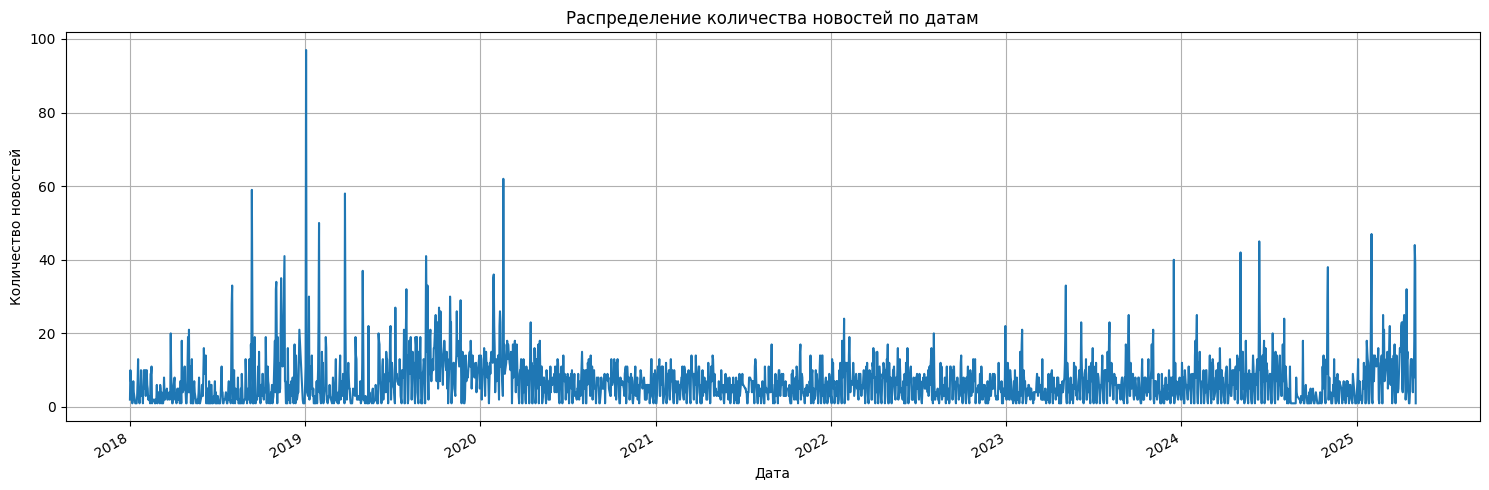

In [129]:
import matplotlib.pyplot as plt

news_counts = apple_news_final.groupby('date').size()

# Построим график
plt.figure(figsize=(15, 5))
news_counts.plot(kind='line')
plt.title('Распределение количества новостей по датам')
plt.xlabel('Дата')
plt.ylabel('Количество новостей')
plt.grid(True)
plt.tight_layout()
plt.show()


In [114]:
apple_news_aggregated.to_csv('apple_news_aggregated.csv', index=False)

In [115]:
apple_news_aggregated

sentiment,date,negative,neutral,positive
0,2018-01-01,0,2,0
1,2018-01-02,1,9,0
2,2018-01-03,3,4,0
3,2018-01-04,2,3,1
4,2018-01-05,3,2,0
...,...,...,...,...
2673,2025-04-27,1,0,3
2674,2025-04-28,4,3,4
2675,2025-04-29,5,3,0
2676,2025-04-30,4,11,3


In [ ]:
import matplotlib.pyplot as plt

news_counts = apple_news_final.groupby('date').size()

# Построим график
plt.figure(figsize=(15, 5))
news_counts.plot(kind='line')
plt.title('Распределение количества новостей по датам (Apple + Nasdaq)')
plt.xlabel('Дата')
plt.ylabel('Количество новостей')
plt.grid(True)
plt.tight_layout()
plt.show()
